<a href="https://colab.research.google.com/github/Manujk-123/Generative_Adversarial_Network/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


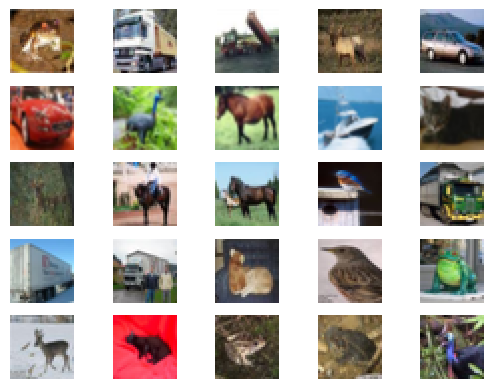

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
 

Epoch>1, Batch 1/390, d1=0.713, d2=0.702, g=0.695
Epoch>1, Batch 2/390, d1=0.706, d2=0.703, g=0.694
Epoch>1, Batch 3/390, d1=0.707, d2=0.705, g=0.692
Epoch>1, Batch 4/390, d1=0.706, d2=0.706, g=0.691
Epoch>1, Batch 5/390, d1=0.707, d2=0.707, g=0.689
Epoch>1, Batch 6/390, d1=0.708, d2=0.708, g=0.688
Epoch>1, Batch 7/390, d1=0.710, d2=0.710, g=0.686
Epoch>1, Batch 8/390, d1=0.711, d2=0.711, g=0.684
Epoch>1, Batch 9/390, d1=0.711, d2=0.712, g=0.682
Epoch>1, Batch 10/390, d1=0.712, d2=0.713, g=0.679
Epoch>1, Batch 11/390, d1=0.713, d2=0.715, g=0.676
Epoch>1, Batch 12/390, d1=0.715, d2=0.716, g=0.672
Epoch>1, Batch 13/390, d1=0.716, d2=0.718, g=0.668
Epoch>1, Batch 14/390, d1=0.719, d2=0.721, g=0.664
Epoch>1, Batch 15/390, d1=0.721, d2=0.724, g=0.659
Epoch>1, Batch 16/390, d1=0.724, d2=0.727, g=0.654
Epoch>1, Batch 17/390, d1=0.727, d2=0.730, g=0.649
Epoch>1, Batch 18/390, d1=0.730, d2=0.733, g=0.644
Epoch>1, Batch 19/390, d1=0.733, d2=0.737, g=0.639
Epoch>1, Batch 20/390, d1=0.737, d2=0.74

Epoch>2, Batch 390/390, d1=1.723, d2=1.724, g=0.109
✅ Generator model saved as cifar_generator_2epochs.h5


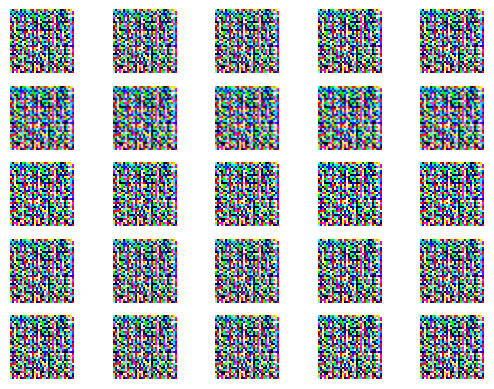

In [ ]:
from numpy import zeros, ones
from numpy.random import randn, randint
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.models import Sequential, load_model
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout
from matplotlib import pyplot as plt
import numpy as np

(trainX, trainy), (testX, testy) = cifar10.load_data()
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.axis('off')
    plt.imshow(trainX[i])
plt.show()

def define_discriminator(in_shape=(32,32,3)):
    model = Sequential()
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def define_generator(latent_dim):
    model = Sequential()
    n_nodes = 128 * 8 * 8
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 128)))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
    return model

def define_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

def load_real_samples():
    (trainX, _), (_, _) = cifar10.load_data()
    X = trainX.astype('float32')
    X = (X - 127.5) / 127.5
    return X

def generate_real_samples(dataset, n_samples):
    ix = randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = ones((n_samples, 1))
    return X, y

def generate_latent_points(latent_dim, n_samples):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

def generate_fake_samples(generator, latent_dim, n_samples):
    x_input = generate_latent_points(latent_dim, n_samples)
    X = generator.predict(x_input, verbose=0)
    y = zeros((n_samples, 1))
    return X, y

def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss_real = d_model.train_on_batch(X_real, y_real)
            if isinstance(d_loss_real, list):
                d_loss_real = d_loss_real[0]
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss_fake = d_model.train_on_batch(X_fake, y_fake)
            if isinstance(d_loss_fake, list):
                d_loss_fake = d_loss_fake[0]
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            if isinstance(g_loss, list):
                g_loss = g_loss[0]
            print(f'Epoch>{i+1}, Batch {j+1}/{bat_per_epo}, d1={d_loss_real:.3f}, d2={d_loss_fake:.3f}, g={g_loss:.3f}')
    filename = f'cifar_generator_{n_epochs}epochs.h5'
    g_model.save(filename)
    print(f"✅ Generator model saved as {filename}")
    return filename

latent_dim = 100
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
dataset = load_real_samples()
saved_model_file = train(generator, discriminator, gan_model, dataset, latent_dim, n_epochs=2)

def show_plot(examples, n):
    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')
        plt.imshow(examples[i, :, :, :])
    plt.show()

model = load_model(saved_model_file)
latent_points = generate_latent_points(100, 25)
X = model.predict(latent_points, verbose=0)
X = (X + 1) / 2.0
X = (X * 255).astype(np.uint8)
show_plot(X, 5)
